# In this notebook, we have the code to train a GAN for the multi minst data

In [22]:
import torch
import torch.optim as optim
from dataloaders import get_mnist_dataloaders, get_multi_mnist_dataloaders
from models import Generator, Discriminator
from training import Trainer
from torch.utils.data import Dataset
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data_loader, _ = get_multi_mnist_dataloaders("data/multi_mnist/", batch_size=64)
img_size = (32, 32, 1)

generator = Generator(img_size=img_size, latent_dim=100, dim=16)
discriminator = Discriminator(img_size=img_size, dim=16)

In [26]:
# Initialize optimizers
lr = 1e-4
betas = (.9, .99)
G_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=betas)
D_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=betas)

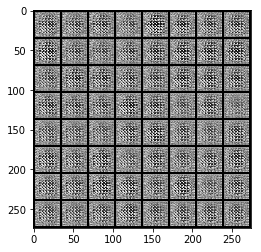

Iteration 1
D: 1.5027092695236206
GP: 2.0845351219177246
Gradient norm: 0.6607776284217834
G: -0.3502599895000458


In [ ]:
# Train model
epochs = 200
trainer = Trainer(generator, discriminator, G_optimizer, D_optimizer,
                  use_cuda=torch.cuda.is_available())
trainer.train(data_loader, epochs, save_training_gif=True, jupyter_notebook=True, save_model= True)